In [1]:
# Importing the Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.utils as tku

In [2]:
# Loading the dataset
from sklearn.datasets import fetch_openml
dataset=fetch_openml("mnist_784")

C:\Users\kiran\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
dataset

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
X,y=dataset['data'],dataset['target']

In [5]:
X=np.array(X)

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
X[675]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  24., 126., 250., 254., 254., 101.,  13.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
y[675]

'3'

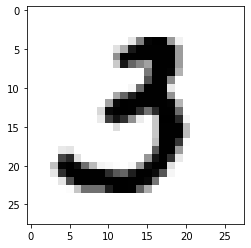

In [12]:
import matplotlib
# Visualization of the digit
demo_digit=X[675]
demo_digit=demo_digit.reshape(28,28)
plt.imshow(demo_digit,cmap=matplotlib.cm.binary,interpolation="nearest")

In [13]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Dense(64,activation="relu",input_dim=784))
cnn.add(tf.keras.layers.Dense(64,activation="relu"))
cnn.add(tf.keras.layers.Dense(10,activation="sigmoid"))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compiling the cnn
cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
# training the cnn on the training set and evaluating on the test set
cnn.fit(X_train,tku.to_categorical(y_train),batch_size=32,epochs=10)

Epoch 1/10
1750/1750 [==============================] - 17s 7ms/step - loss: 1.5816 - accuracy: 0.8187
Epoch 2/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.4088 - accuracy: 0.8974
Epoch 3/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.3200 - accuracy: 0.9180
Epoch 4/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.2773 - accuracy: 0.9294
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2310 - accuracy: 0.9391
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2007 - accuracy: 0.9463
Epoch 7/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1765 - accuracy: 0.9499
Epoch 8/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1574 - accuracy: 0.9562
Epoch 9/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1439 - accuracy: 0.9589
Epoch 10/10
1750/1750 [==============================] - 11s 6ms/step - loss

In [19]:
cnn.evaluate(X_test,tku.to_categorical(y_test))

438/438 [==============================] - 3s 6ms/step - loss: 0.1807 - accuracy: 0.9531


[0.18070769309997559, 0.9530714154243469]

In [20]:
test_image=X[675]
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
result

1/1 [==============================] - 1s 840ms/step


array([[3.3479196e-03, 9.2744225e-01, 9.2597497e-01, 1.0000000e+00,
        3.3941756e-08, 1.0000000e+00, 1.7504627e-02, 1.1402267e-03,
        9.9931288e-01, 9.9999744e-01]], dtype=float32)